In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

In [208]:
contacts = pd.read_csv('contacts.csv')
listings = pd.read_csv('listings.csv')
users = pd.read_csv('users.csv')

In [209]:
print('contacts shape :{}'.format(contacts.shape))
print('listings shape :{}'.format(listings.shape))
print('users shape :{}'.format(users.shape))

contacts shape :(27887, 14)
listings shape :(13038, 4)
users shape :(31525, 3)


### Objectives : 
#### ==> Find key metrics that illustrates very well team's effort in the improvement of guest host matching
#### ==> Features important in the guest host matching
#### STEPS :
#### 1_ Preprocessing
#### 2_ EDA
#### 3_ Modeling

#### Let's start with a basic overview of the data and preprocessing

In [210]:
#Missing values are normal as there is no necessarily inquiries or booking
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27887 entries, 0 to 27886
Data columns (total 14 columns):
id_guest_anon                           27887 non-null object
id_host_anon                            27887 non-null object
id_listing_anon                         27887 non-null object
ts_interaction_first                    27887 non-null object
ts_reply_at_first                       25855 non-null object
ts_accepted_at_first                    16415 non-null object
ts_booking_at                           11587 non-null object
ds_checkin_first                        27887 non-null object
ds_checkout_first                       27887 non-null object
m_guests                                27886 non-null float64
m_interactions                          27887 non-null int64
m_first_message_length_in_characters    27887 non-null float64
contact_channel_first                   27887 non-null object
guest_user_stage_first                  27887 non-null object
dtypes: float64(2), in

In [211]:
contacts.head()

,id_guest_anon,id_host_anon,id_listing_anon,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,guest_user_stage_first
0,da8656a1-51af-4f38-b1c4-94be1f585157,5426897d-960d-4013-9e38-606ae746793c,a408a8b2-0d44-4513-a611-3736d0409bb2,2016-04-21 02:55:53,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-04-21 03:15:00.0,2016-08-02,2016-08-06,4.0,30,31.0,book_it,past_booker
1,8590d6f1-8bc9-4e8b-bdfb-de78f69fcf37,f30417c5-6df4-45ac-bfc2-6ad1cce398ab,e387c705-0aeb-464c-9375-ece63be6f006,2016-02-16 22:14:01,2016-02-16 23:37:36.0,NaN,NaN,2016-08-11,2016-08-22,5.0,2,312.0,contact_me,past_booker
2,ebcd83ba-bda1-47eb-9680-2dd04ccf3988,13cbf50a-3272-45d4-9866-a06b6ea1b99a,d1eb1960-938f-4305-a353-51e224414dd4,2016-01-27 23:33:38,2016-01-28 02:12:47.0,NaN,NaN,2016-03-14,2016-03-23,1.0,3,164.0,contact_me,new
3,b0af8848-fe2a-4ef1-991e-26ab3066feb3,01614601-d5a4-4776-ab9b-c10d3b865bf0,855f6779-346c-45fc-a64b-ea133250ca7a,2016-05-05 14:42:52,2016-05-05 15:17:40.0,2016-05-05 15:17:40.0,NaN,2016-05-27,2016-05-29,2.0,3,203.0,contact_me,new
4,5ddbbcc3-ac1a-4d8a-b6f8-0f675b76d1b2,f2fed6f3-4c5c-453d-9e64-37c62b8bd06d,f2928a59-c5e7-42b2-9c37-240a40f38dc0,2016-06-23 03:09:25.0,2016-06-23 03:09:26.0,2016-06-23 03:09:33.0,2016-06-23 03:09:33.0,2016-08-19,2016-08-21,3.0,25,0.0,instant_book,past_booker


In [212]:
#Proprocessing and feature ingeenering 

# 1. turning time columns into times format
col_time = contacts.iloc[:,3:9].columns
for i in col_time:
    contacts[i] = pd.to_datetime(contacts[i])
    
# 2. creating a target features 'matching'
contacts['matching'] = [0 if pd.isna(x) else 1 for x in contacts['ts_booking_at']]

In [213]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13038 entries, 0 to 13037
Data columns (total 4 columns):
id_listing_anon         13038 non-null object
room_type               13038 non-null object
listing_neighborhood    13038 non-null object
total_reviews           13038 non-null float64
dtypes: float64(1), object(3)
memory usage: 407.5+ KB


In [214]:
listings.head()

,id_listing_anon,room_type,listing_neighborhood,total_reviews
0,71582793-e5f8-46d7-afdf-7a31d2341c79,Private room,-unknown-,0.0
1,a1a3f728-e21f-4432-96aa-361d28e2b319,Entire home/apt,Copacabana,0.0
2,353a68be-ecf9-4b7b-9533-c882dc2f0760,Entire home/apt,Barra da Tijuca,3.0
3,b9ae1908-0486-40ac-bbcf-bd63ffebfe63,Entire home/apt,Lapa,4.0
4,fa0290ef-7881-4482-8981-8ebb1ce5dbfd,Entire home/apt,-unknown-,0.0


In [215]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31525 entries, 0 to 31524
Data columns (total 3 columns):
id_user_anon             31525 non-null object
country                  31524 non-null object
words_in_user_profile    31525 non-null int64
dtypes: int64(1), object(2)
memory usage: 738.9+ KB


In [216]:
users.head()

,id_user_anon,country,words_in_user_profile
0,1d16a001-31a2-494c-a101-1f7b308adc62,FR,0
1,42607e0a-86c0-472e-b633-9e192114e93c,AR,0
2,25f85eb5-a700-44e1-b142-4c076222198d,BR,0
3,55abeba0-18ef-4c58-80f4-3c278b706aca,BR,1
4,5d62d35a-7d6d-45dd-ae9b-a5d2f82a7d7b,BR,98


In [217]:
#let's merge those datasets together to have more insights and create a few more features

#1. importing info about guest and hosts from users table
guests = users.copy()
hosts = users.copy()
guests.columns=['id_user_anon','country_guest','words_in_user_profile_guest']
hosts.columns=['id_user_anon','country_hosts','words_in_user_profile_hosts']

contacts = contacts.merge(guests,how='inner',right_on='id_user_anon', left_on='id_guest_anon')
contacts = contacts.merge(hosts,how='inner',right_on='id_user_anon', left_on='id_host_anon')

#2. importing rooms info
df_full = contacts.merge(listings,how='inner',right_on='id_listing_anon', left_on='id_listing_anon')

#3 droping ids that are no longer usefull
df_full.drop(axis=1, columns=['id_guest_anon','id_host_anon','id_listing_anon','id_user_anon_x','id_user_anon_y'],inplace=True)

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28472 entries, 0 to 28471
Data columns (total 19 columns):
ts_interaction_first                    28472 non-null datetime64[ns]
ts_reply_at_first                       26383 non-null datetime64[ns]
ts_accepted_at_first                    16669 non-null datetime64[ns]
ts_booking_at                           11740 non-null datetime64[ns]
ds_checkin_first                        28472 non-null datetime64[ns]
ds_checkout_first                       28472 non-null datetime64[ns]
m_guests                                28471 non-null float64
m_interactions                          28472 non-null int64
m_first_message_length_in_characters    28472 non-null float64
contact_channel_first                   28472 non-null object
guest_user_stage_first                  28472 non-null object
matching                                28472 non-null int64
country_guest                           28471 non-null object
words_in_user_profile_guest          

In [218]:
#4. creating potential usefull features 

#identify if host & guest are from the same country
df_full['same_country'] = df_full['country_hosts'] == df_full['country_guest']

#calculate time lapst between inquiry and answers from the hosts
df_full['answer_time_laps'] = df_full['ts_reply_at_first'] - df_full['ts_interaction_first']

#calculate length of the stay
df_full['stay_length'] = df_full['ds_checkout_first'] - df_full['ds_checkin_first']

In [219]:
print(df_full.head())

  ts_interaction_first   ts_reply_at_first ts_accepted_at_first  \
0  2016-04-21 02:55:53 2016-04-21 03:15:00  2016-04-21 03:15:00   
1  2016-05-16 01:44:04 2016-05-16 01:42:54  2016-05-16 01:42:54   
2  2016-03-01 00:32:37 2016-03-01 00:59:39  2016-03-01 01:01:44   
3  2016-01-10 17:54:54 2016-01-10 17:54:54  2016-01-10 17:54:54   
4  2016-01-11 22:16:09 2016-01-11 22:28:28  2016-01-11 22:49:43   

        ts_booking_at ds_checkin_first ds_checkout_first  m_guests  \
0 2016-04-21 03:15:00       2016-08-02        2016-08-06       4.0   
1                 NaT       2016-07-11        2016-07-25       2.0   
2                 NaT       2016-03-04        2016-03-07       2.0   
3 2016-01-10 17:54:54       2016-03-20        2016-03-23       2.0   
4                 NaT       2016-04-09        2016-04-11       2.0   

   m_interactions  m_first_message_length_in_characters contact_channel_first  \
0              30                                  31.0               book_it   
1             

In [378]:
# Check the full table's details and features' distribution 
df_full.describe(include='all')

,ts_interaction_first,ts_reply_at_first,ts_accepted_at_first,ts_booking_at,ds_checkin_first,ds_checkout_first,m_guests,m_interactions,m_first_message_length_in_characters,contact_channel_first,...,country_guest,words_in_user_profile_guest,country_hosts,words_in_user_profile_hosts,room_type,listing_neighborhood,total_reviews,same_country,answer_time_laps,stay_length
count,28472,26383,16669,11740,28472,28472,28471.000000,28472.000000,28472.000000,28472,...,28471,28472.000000,28472,28472.000000,28472,28472,28472.000000,28472,26383,28472
unique,27857,25834,16409,11584,422,443,NaN,NaN,NaN,3,...,121,NaN,26,NaN,3,68,NaN,2,NaN,NaN
top,2016-06-28 02:30:13,2016-01-13 13:47:30,2016-02-16 05:25:58,2016-02-16 05:25:58,2016-02-05 00:00:00,2016-02-10 00:00:00,NaN,NaN,NaN,contact_me,...,BR,NaN,BR,NaN,Entire home/apt,-unknown-,NaN,False,NaN,NaN
freq,4,4,4,4,1284,1505,NaN,NaN,NaN,13169,...,13958,NaN,28151,NaN,21454,12040,NaN,14611,NaN,NaN
first,2016-01-01 00:46:47,2016-01-01 01:07:50,2016-01-01 12:24:15,2016-01-01 12:24:15,2016-01-01 00:00:00,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-06-30 23:58:14,2017-02-23 08:56:59,2016-11-22 11:11:12,2016-09-21 21:55:48,2018-05-01 00:00:00,2018-05-04 00:00:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.789962,8.226925,193.932038,NaN,...,NaN,10.196965,NaN,54.913599,NaN,NaN,15.535122,NaN,0 days 14:49:10.712390,7 days 13:27:11.581905
std,NaN,NaN,NaN,NaN,NaN,NaN,1.880613,10.001157,183.512161,NaN,...,NaN,30.813059,NaN,103.290321,NaN,NaN,27.583073,NaN,5 days 20:10:25.461637,14 days 07:30:20.141486
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,...,NaN,0.000000,NaN,0.000000,NaN,NaN,-34.000000,NaN,-1 days +23:58:50,1 days 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,66.000000,NaN,...,NaN,0.000000,NaN,1.000000,NaN,NaN,0.000000,NaN,0 days 00:01:42,3 days 00:00:00


#### 2.1 DISTRIBUTION

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


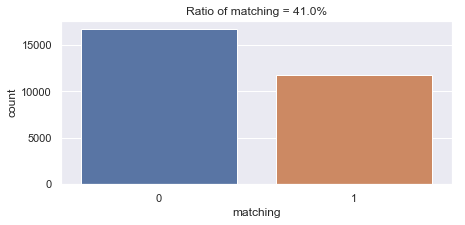

In [325]:
# Defining dependant and independant variables
X = df_full.drop(columns=['matching'],axis=1)
y = df_full['matching']

#Defining numerical categorical & time variables dataframe
numeric = df_full[['m_guests','m_interactions','m_first_message_length_in_characters','words_in_user_profile_guest','words_in_user_profile_hosts','total_reviews']]
categoric = df_full[['contact_channel_first','guest_user_stage_first','room_type','same_country']]
#this dataframe is for variables with many modality
categoric2 = df_full[['country_guest','country_hosts','listing_neighborhood']]
categoric2['count'] = 1
time = df_full[['answer_time_laps','stay_length','matching']]

#Plot the distribution of the dependant variable MATCHING
plt.figure(figsize=(7,3))
sns.countplot(y)
plt.xlabel('matching')
plt.ylabel('count')
plt.title('Ratio of matching = '+ str(round(len(y[y==1])*100/len(y),0))+'%')
plt.show()

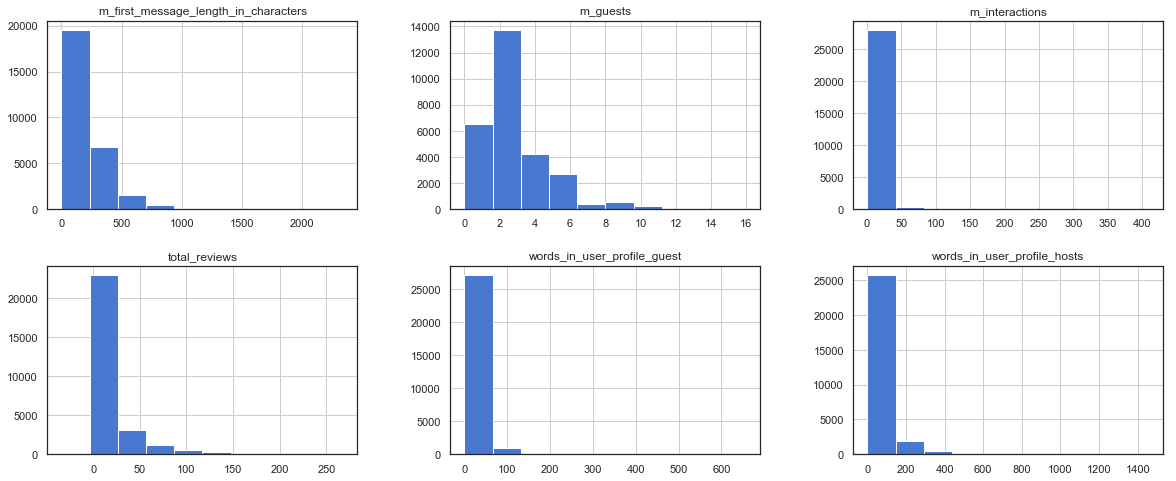

In [222]:
#let's plot the distribution of the numerical independant variables
sns.set(style="white", palette="muted", color_codes=True)
numeric.hist(figsize=(20, 17), layout=(4, 3));

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


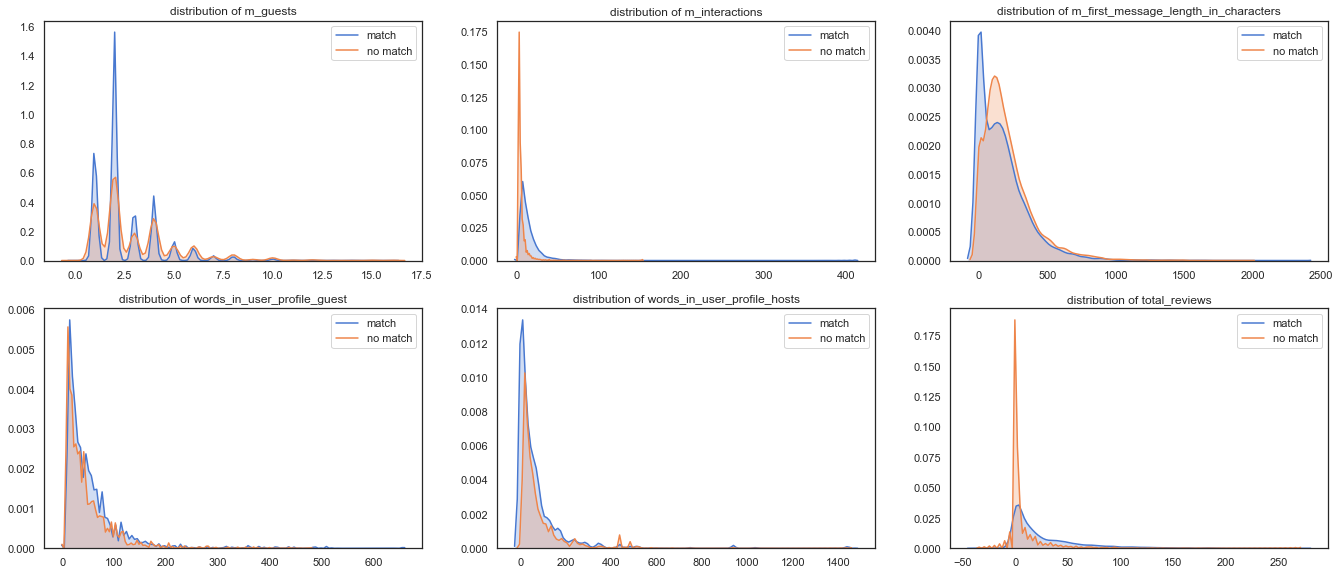

In [223]:
#INSIGHTS : 
#M_REVIEWS = 0 reviews leads to no matching (guest suspicious?)
#M_first_message_length = optimal length looks like to be 50 to 200 characters.
fig = plt.figure(figsize=(23,15))
i = 1
for col in numeric.columns:
    plt.subplot(3,3,i)
    sns.kdeplot(numeric[col][y == 1], label='match', shade=True)
    sns.kdeplot(numeric[col][y == 0], label='no match', shade=True)
    plt.title('distribution of '+ col)
    i +=1

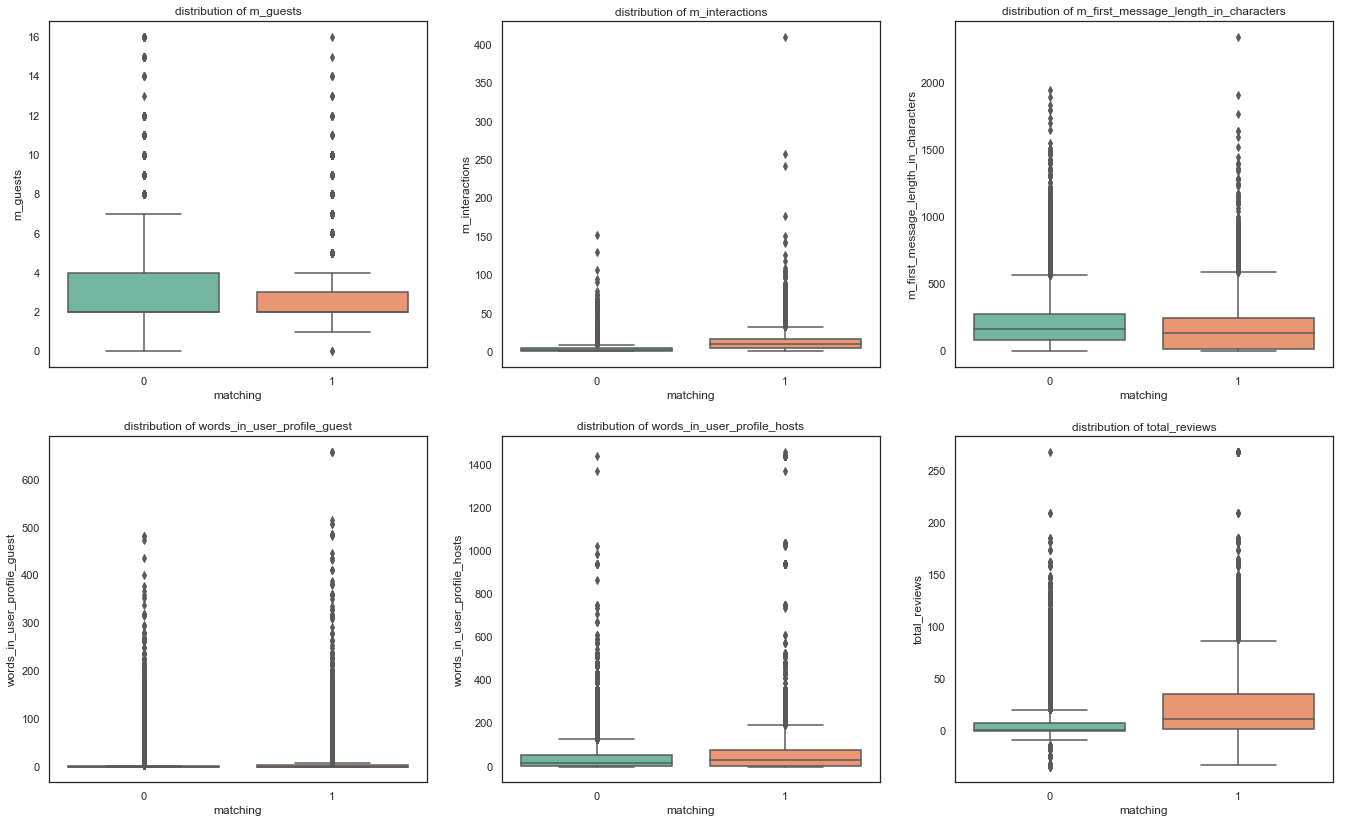

In [224]:
#We can see there is a clear relationship between matching and totol_reviews
#The more guest there is in a inquiry, the less chance the inquiry has to be accepted

fig = plt.figure(figsize=(23,14))
for i in range(len(numeric.columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=y , y=numeric.columns[i], data=numeric, orient="v", palette="Set2")
    plt.title('distribution of '+ numeric.columns[i])

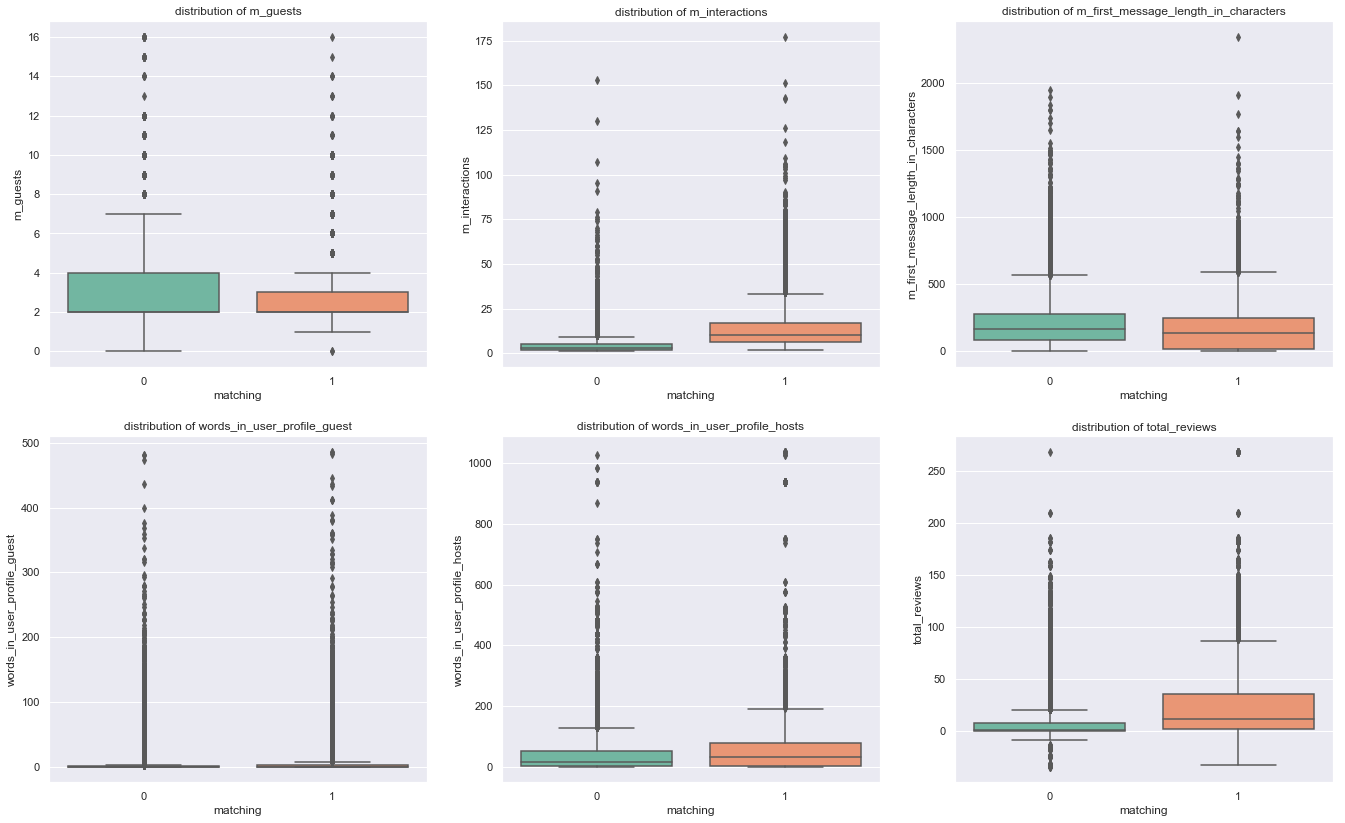

In [309]:
#let's remove some outliers just to have larger bloxplot

numeric = numeric[numeric['m_interactions'] < 200 ]
numeric = numeric[numeric['words_in_user_profile_guest'] < 500 ]
numeric = numeric[numeric['words_in_user_profile_hosts'] < 1200 ]

fig = plt.figure(figsize=(23,14))
for i in range(len(numeric.columns)):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=y , y=numeric.columns[i], data=numeric, orient="v", palette="Set2")
    plt.title('distribution of '+ numeric.columns[i])

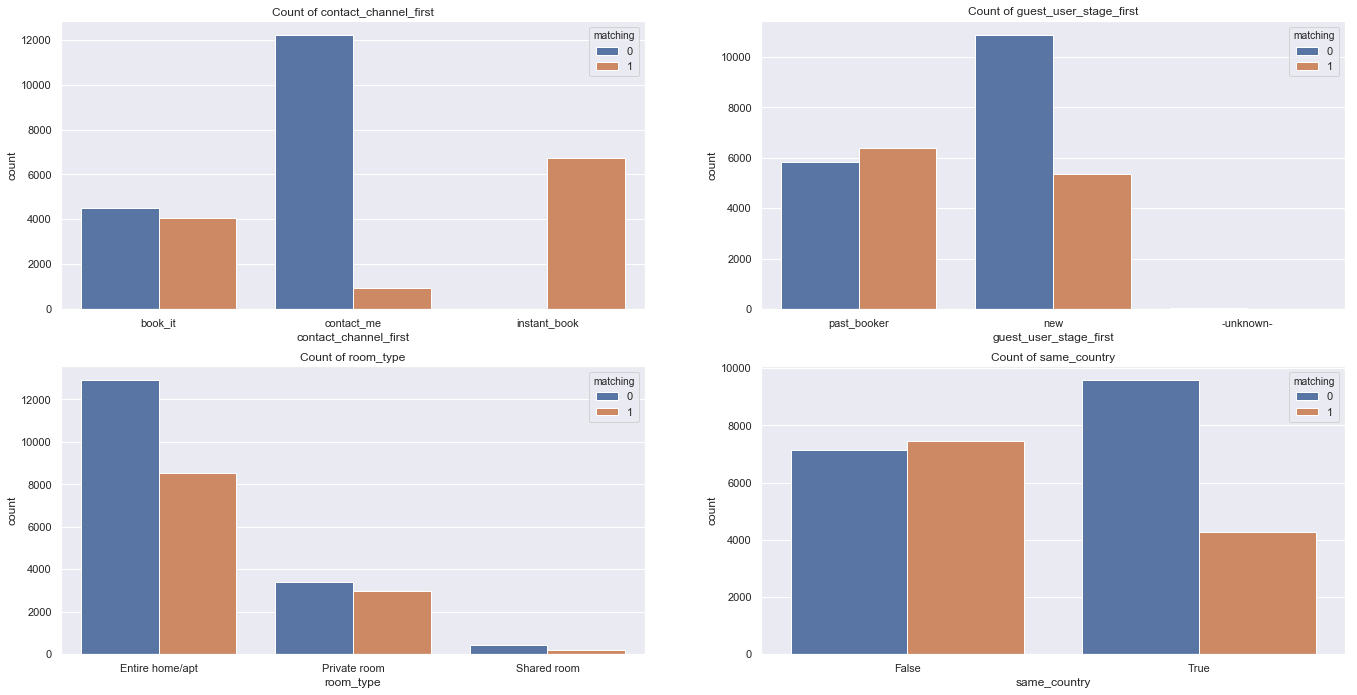

In [326]:
#let's check the boolean and categorical features
# GUEST USER STAGE FIRST :We can see there is clear advantages to make a booking before sending an inquiry, this probably encourage the host to answer and validate the booking
# CONTACT CHANNEL FIRST: There is also a mental mechnism that discourage host to accept booking when they set their offer on "contact me" as they have to review each inquiry 
# which takes time and ultimately make them more encline to say no for any details

fig = plt.figure(figsize=(23,18))
for i in range(len(categoric.columns)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=categoric.columns[i], data=categoric, hue=y, orient="v")
    plt.title('Count of '+ categoric.columns[i])

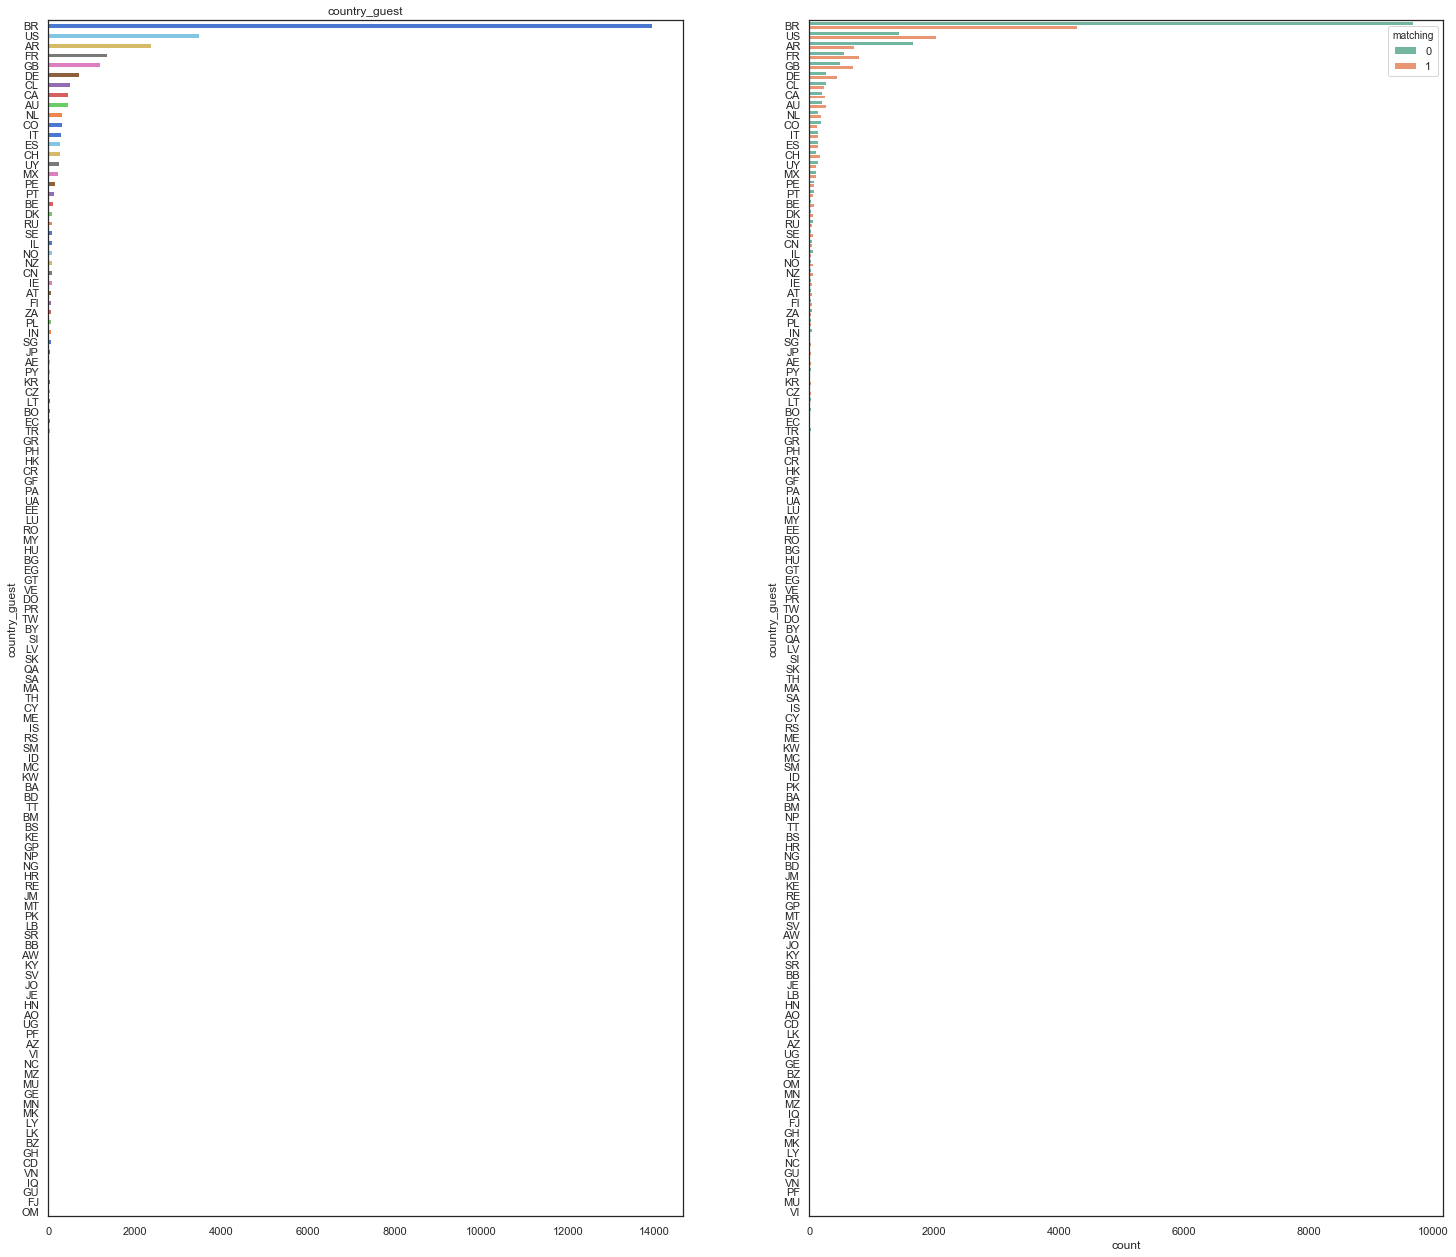

In [227]:
#insight : huge part of the tourist are from a few country and 2 of them suffer from a high no matching ratio ==> AR (Argentine) and BR (brezil)
# SAME COUNTRY = Brazilian looks like to be more suspicious toward their citizens instead of the rest of the world (maybe there is behaviours issues)

fig = plt.figure(figsize=(25,22))

plt.subplot(1,2,1)
cdf_country = categoric2.groupby('country_guest')['count'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('country_guest')

plt.subplot(1,2,2)
sns.countplot(y=categoric2['country_guest'], data=categoric, hue=y, palette="Set2", order=categoric2['country_guest'].value_counts().index, orient="h")

Text(0.5, 1.0, 'Districts matching')

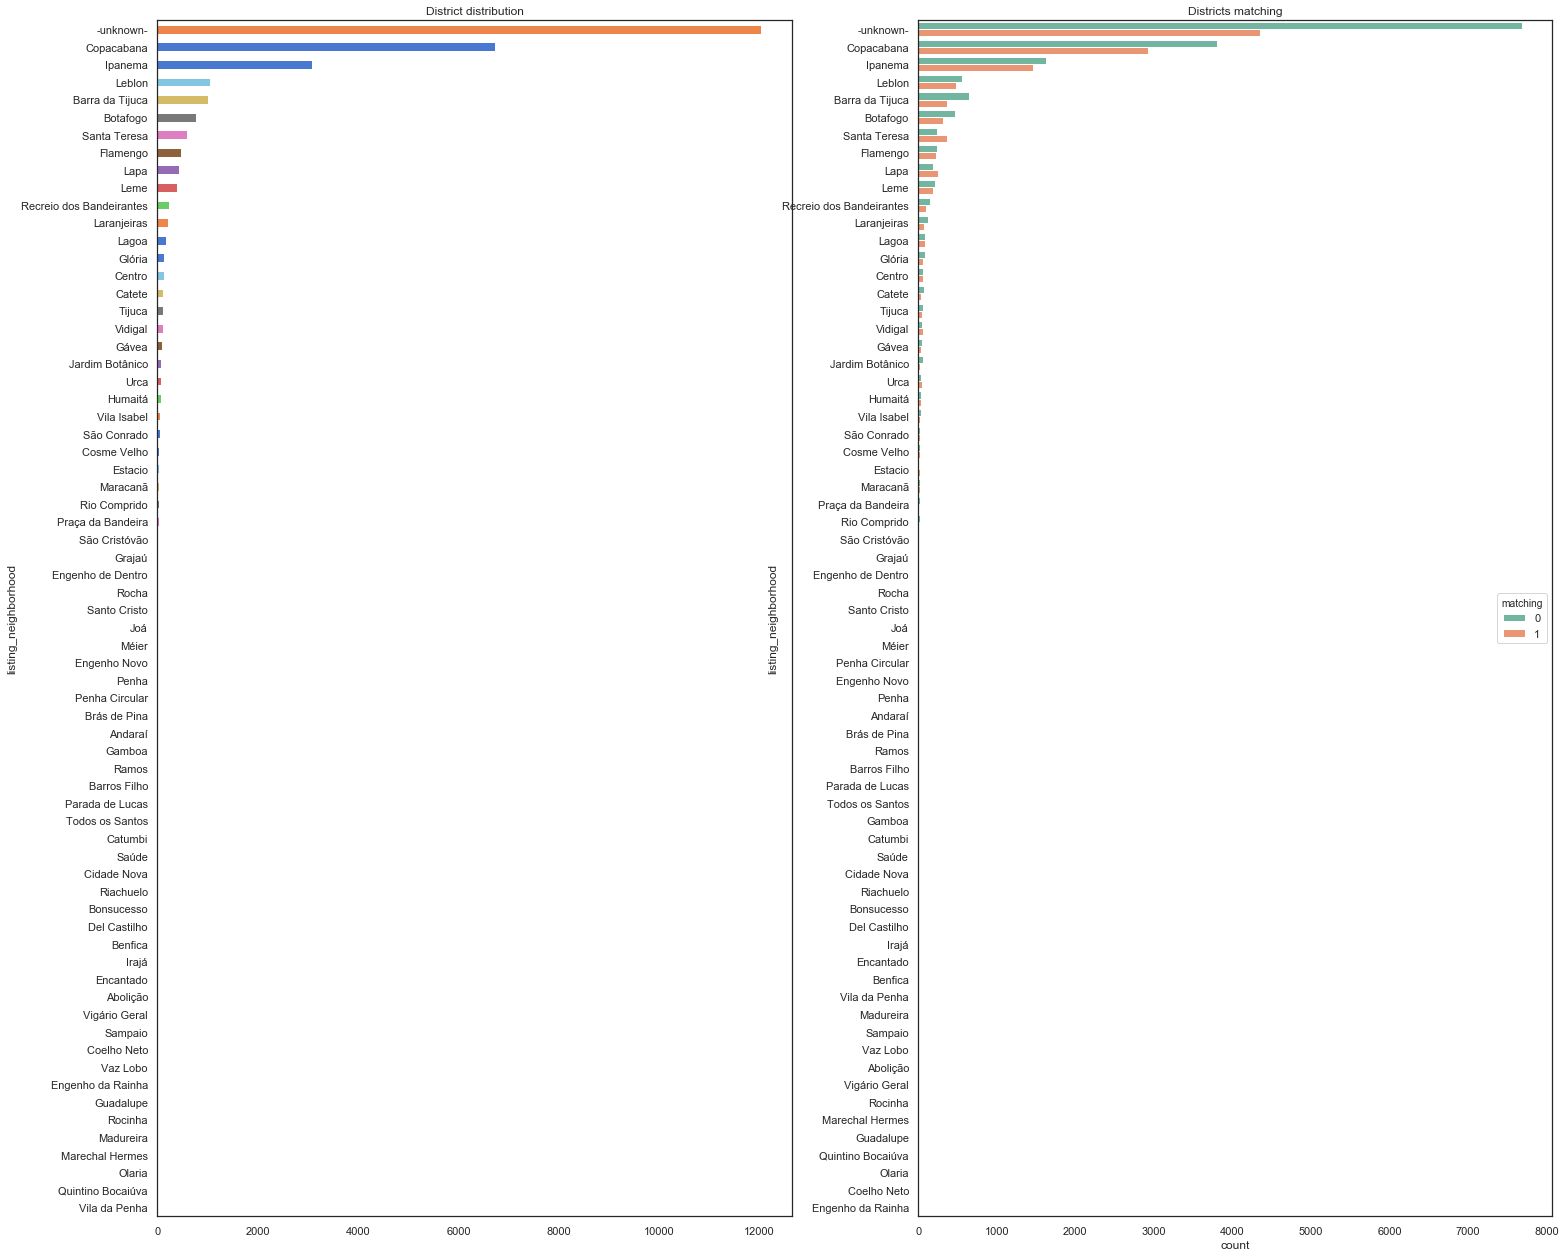

In [228]:
#DISTRICT FEATURES : A major part of the districts are unknown and the ratio of matching is lower than the rest 
# Strange situation because it looks like most of tourist go there but they are more demanding to accept a booking

fig = plt.figure(figsize=(25,22))

plt.subplot(1,2,1)
cdf_country = categoric2.groupby('listing_neighborhood')['count'].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('District distribution')

plt.subplot(1,2,2)
sns.countplot(y=categoric2['listing_neighborhood'], data=categoric2, hue=y, palette="Set2", order=categoric2['listing_neighborhood'].value_counts().index, orient="h")
plt.title('Districts matching')

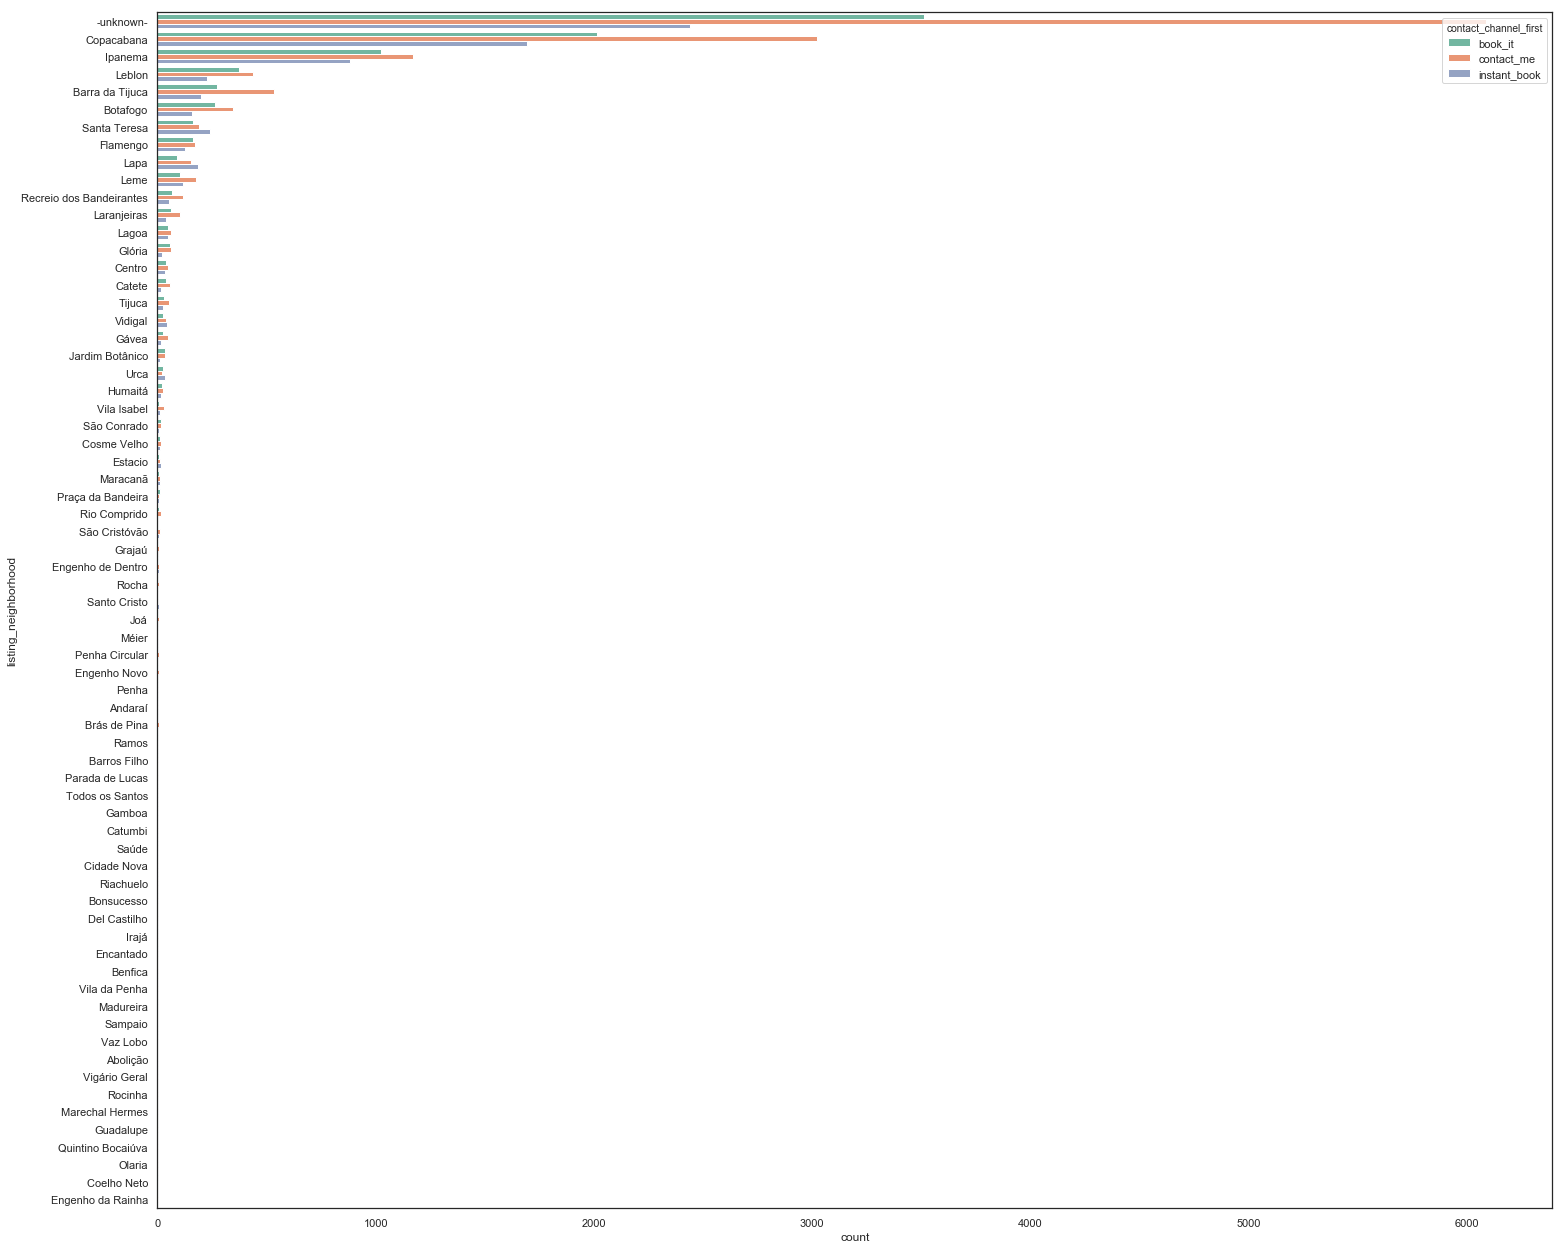

In [229]:
# DISTRICT with contact channel : Major part of unknown district hosts use contact_me channel which reflects the poor matching ratio

fig = plt.figure(figsize=(25,22))
plt.subplot(1,1,1)
sns.countplot(y='listing_neighborhood', data=df_full, hue='contact_channel_first', palette="Set2", order=categoric2['listing_neighborhood'].value_counts().index, orient="h")

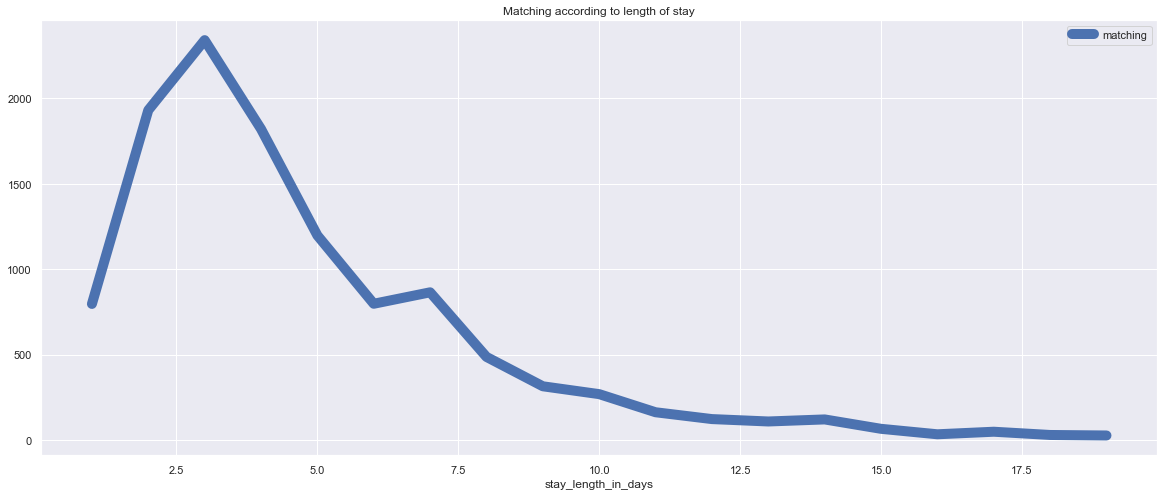

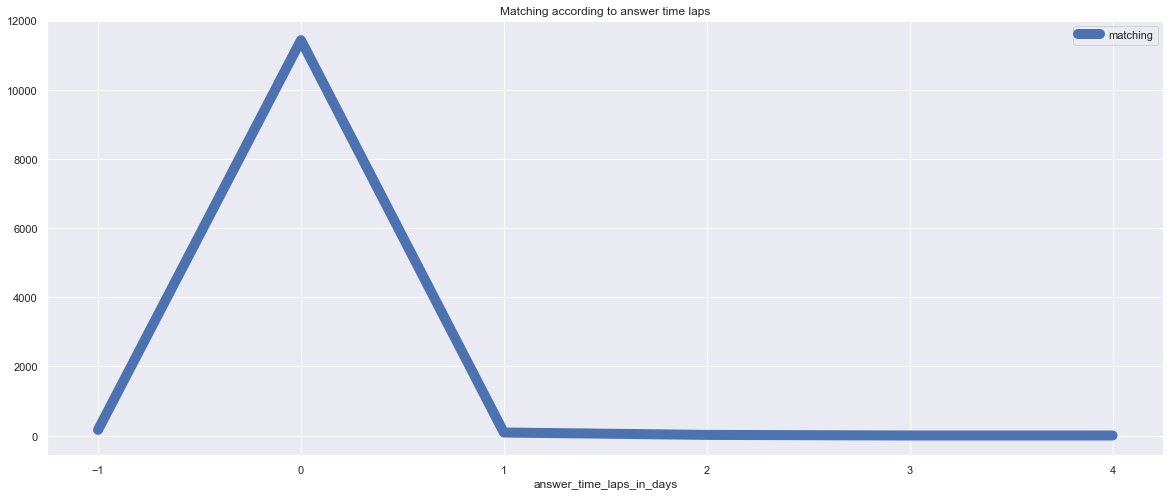

In [375]:
#TIMES PLOT

#matching according to stay length inquiry from guest
#INSIGHT = best stay length looks like to be 3 days which is probably related to the weekend length when host rent their flat

df_stay_length = pd.DataFrame(time.groupby(by='stay_length')['matching'].sum())
df_stay_length['stay_length_in_days'] = df_stay_length.index
df_stay_length['stay_length_in_days']= df_stay_length['stay_length_in_days'].apply(lambda x: x.days)

df_stay_length_ultimate = pd.DataFrame(df_stay_length.groupby(by='stay_length_in_days')['matching'].sum())
sns.set(rc={'figure.figsize':(20, 8)})
df_stay_length_ultimate[df_stay_length_ultimate.index < 20].plot(linewidth=10,title='Matching according to length of stay')


#matching according to the answer time laps from the hosts
#INSIGHT = best is the answer from host within a day to improve matching ratio

df_answer_time_laps = pd.DataFrame(time.groupby(by='answer_time_laps')['matching'].sum())
df_answer_time_laps['answer_time_laps_in_days'] = df_answer_time_laps.index
df_answer_time_laps['answer_time_laps_in_days']= df_answer_time_laps['answer_time_laps_in_days'].apply(lambda x: x.days)

df_answer_time_laps_ultimate = pd.DataFrame(df_answer_time_laps.groupby(by='answer_time_laps_in_days')['matching'].sum())
sns.set(rc={'figure.figsize':(20, 8)})
df_answer_time_laps_ultimate[df_answer_time_laps_ultimate.index < 5].plot(linewidth=10,title='Matching according to answer time laps');

Text(0.5, 1.0, 'distribution of answer time laps stay in days')

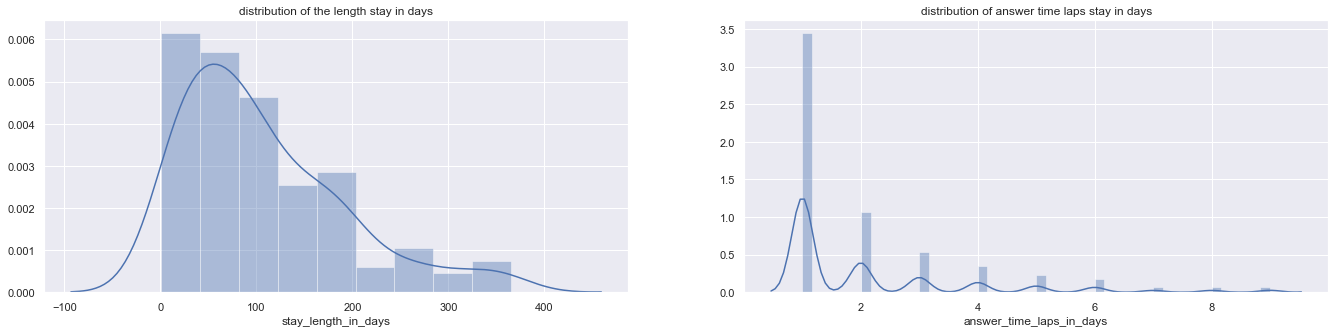

In [356]:
#With the distribution of those 2 times series we can see the length required by tourist of stay is quite high compared to the one accepted at the end for the booking
# This confirm there is a need not fullfilled 


plt.figure(figsize=(23,5))
plt.subplot(1,2,1)
sns.distplot(df_stay_length['stay_length_in_days']’)
plt.title('distribution of the length stay in days')
plt.subplot(1,2,2)
sns.distplot(df_answer_time_laps['answer_time_laps_in_days'][df_answer_time_laps['answer_time_laps_in_days']<10][df_answer_time_laps['answer_time_laps_in_days']>0])
plt.title('distribution of answer time laps stay in days')

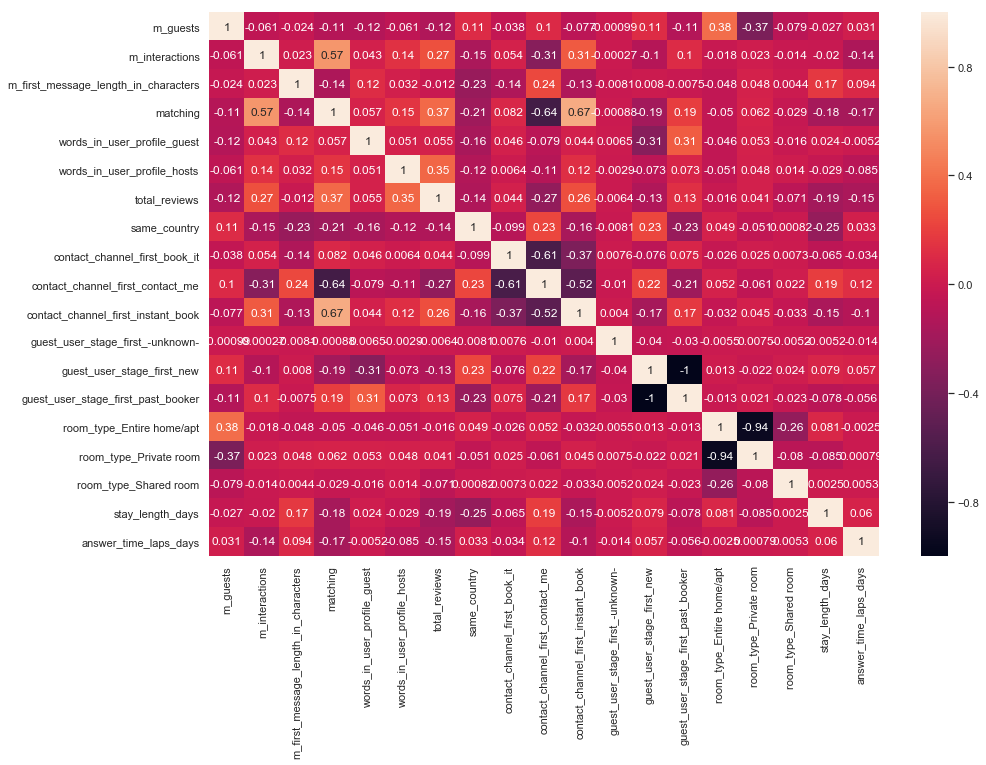

In [231]:
# Encoding of categorical variables to visualise their relationship with matching features

df_encoded = pd.get_dummies(df_full.drop(axis=1,columns=['country_guest', 'country_hosts' ,'listing_neighborhood']))
df_encoded['stay_length_days'] = df_full['stay_length'].apply(lambda x: x.days)
df_encoded['answer_time_laps_days'] = df_full['answer_time_laps'].apply(lambda x: x.days)

#let's analyse the relationship between numerical variables and matching variables
#We can clearly see the feature total reviews and m_interactions are related to the matching metric
plt.figure(1,figsize=(15,10))
sns.heatmap(df_encoded.corr('spearman'), annot=True)

#### 3. MODELLING with Random Forest

In [380]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop(columns=['matching'], axis=1)
X['stay_length_days'] = df_full['stay_length'].apply(lambda x: x.days)
X['answer_time_laps_days'] = df_full['answer_time_laps'].apply(lambda x: x.days)
X.drop(columns=['ts_interaction_first', 'ts_reply_at_first', 'ts_accepted_at_first', 'ts_booking_at','answer_time_laps','ds_checkin_first','ds_checkout_first','stay_length'],axis=1,inplace=True)
X = X.fillna(0)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
print('accuracy on trainset :{} and accuracy on testset : {}'.format(model.score(X_train,y_train),model.score(X_test,y_test)))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy on trainset :0.9935273457099849 and accuracy on testset : 0.9136033715757433


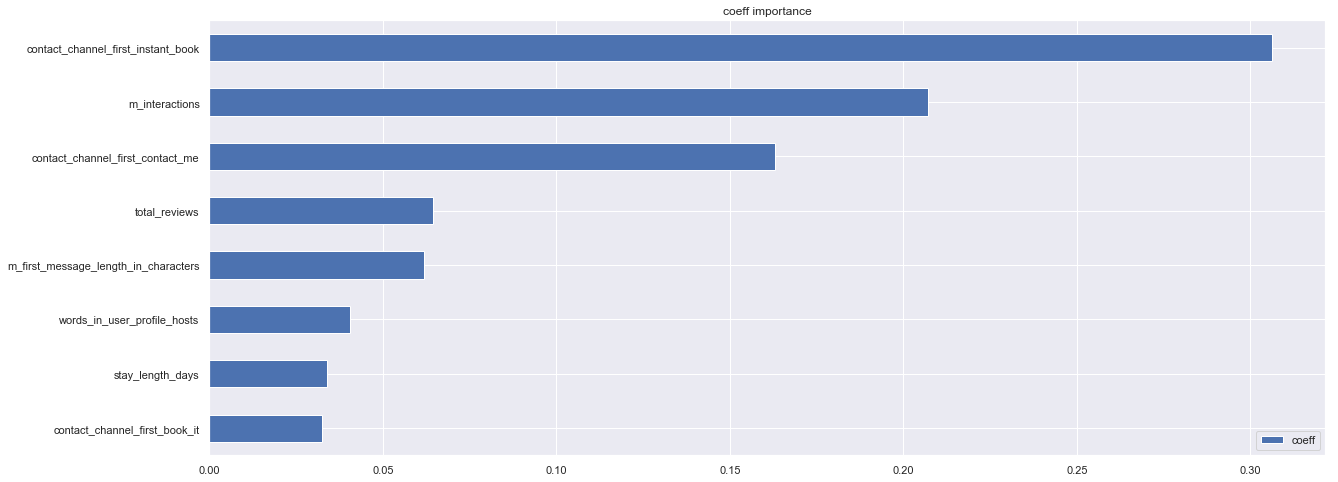

In [383]:
#let's check features importance of the model to have other insights

feature_importance = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['coeff'])\
                  .sort_values(by='coeff',ascending=True)
feature_importance[feature_importance['coeff']>0.03].plot.barh(title='coeff importance')

In [364]:
feature_importance.sort_values(by='coeff', ascending=False)

,coeff
contact_channel_first_instant_book,0.335303
m_interactions,0.195749
contact_channel_first_contact_me,0.129999
total_reviews,0.082932
m_first_message_length_in_characters,0.052999
words_in_user_profile_hosts,0.042151
contact_channel_first_book_it,0.042118
stay_length_days,0.035725
m_guests,0.022157
words_in_user_profile_guest,0.020956


In [307]:
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': range(10,30,10),
         'min_samples_leaf': range(5,15,5),
         'max_depth': range(30,70,10)}
Grid = GridSearchCV(model, cv=10, param_grid=params).fit(X_train,y_train)

print('score sur train :{} et score sur test: {}'.format(Grid.score(X_train, y_train),Grid.score(X_test, y_test)))


score sur train :0.9480180632212745 et score sur test: 0.9171154296417701


In [300]:
Grid.best_estimator_.score(X_train, y_train)

0.9357752132463623

In [301]:
Grid.best_params_

{'max_depth': 60, 'min_samples_leaf': 10, 'n_estimators': 20}